In [1]:
import matplotlib.pyplot as plt
import polars as pl
import pandas as pd
import seaborn as sns
from matplotlib.style import reload_library
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from machine_learning.config import EXTERNAL_DATA_DIR, MPLSTYLE_DIR

2025-02-23 12:57:50.841 | INFO     | machine_learning.config:<module>:11 - PROJ_ROOT path is: D:\Documents\3 Production Save Files\1 Cloned repositories\machine-learning


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 
  
# metadata 
print(predict_students_dropout_and_academic_success.metadata) 
  
# variable information 
print(predict_students_dropout_and_academic_success.variables) 


{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

In [30]:
corrplot = X[:]
corrplot['target'] = y

In [33]:
y.value_counts()

Target  
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
corrplot['target'] = le.fit_transform(corrplot['target'])

In [37]:
corrplot['target'].value_counts()

target
2    2209
0    1421
1     794
Name: count, dtype: int64

<Axes: >

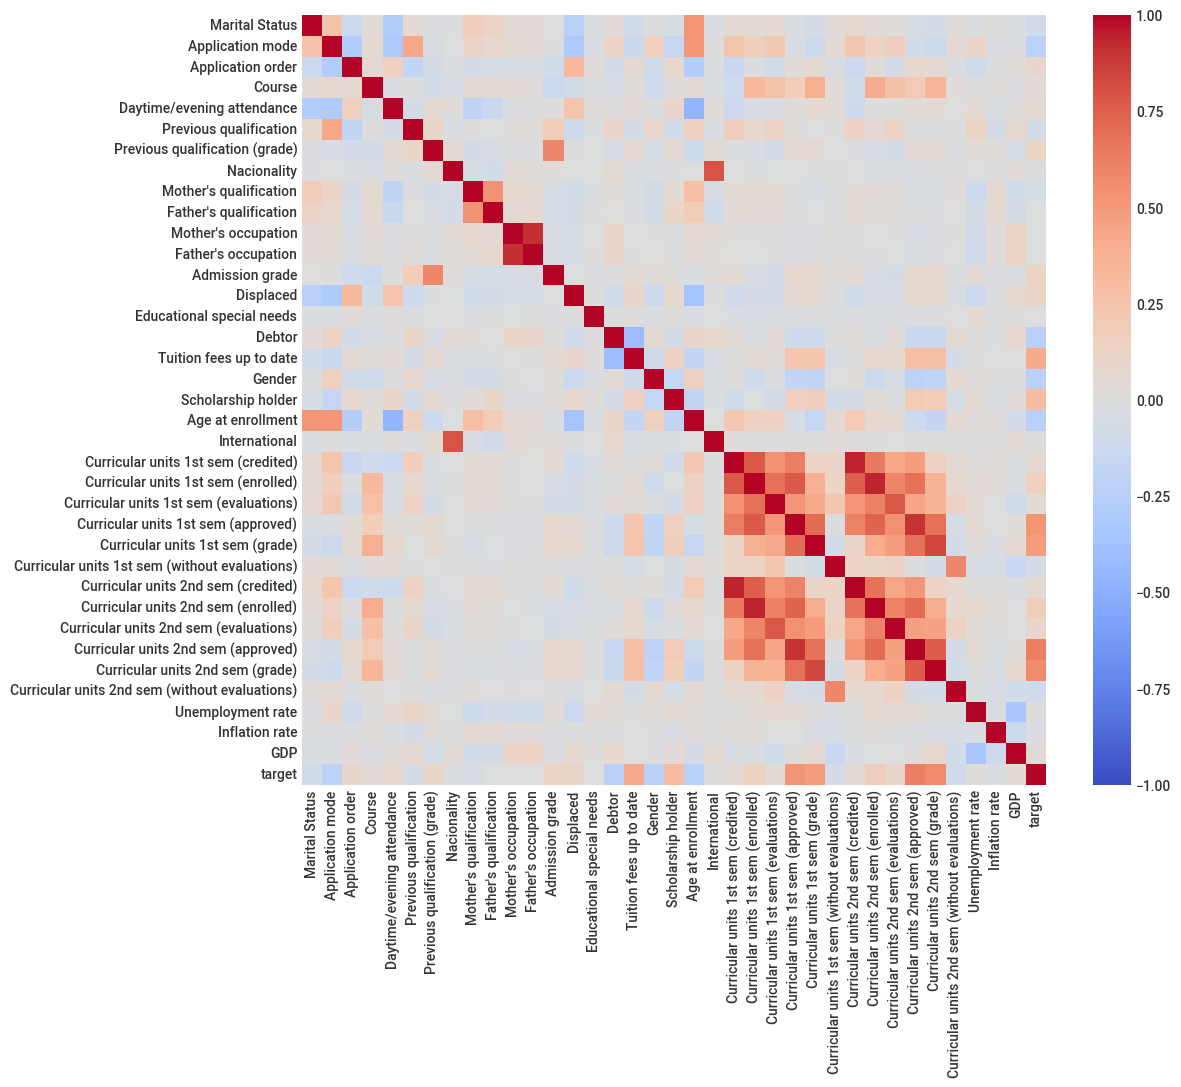

In [39]:
plt.figure(figsize=(12, 10))
sns.heatmap(corrplot.corr(numeric_only=True), cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
sns.scatterplot(X, x='Nacionality', "International")

In [47]:
from ydata_profiling import ProfileReport

profile = ProfileReport(corrplot, title='Pandas Profiling Report', explorative=True)
profile.to_file("dropout.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
features = [
    'Previous qualification (grade)',
    'Curricular units 2nd sem (grade)',
    'Debtor',
    'Scholarship holder',
]
X[features]

,Previous qualification (grade),Curricular units 2nd sem (grade),Debtor,Scholarship holder
0,122.0,0.000000,0,0
1,160.0,13.666667,0,0
2,122.0,0.000000,0,0
3,122.0,12.400000,0,0
4,100.0,13.000000,0,0
...,...,...,...,...
4419,125.0,12.666667,0,0
4420,120.0,11.000000,1,0
4421,154.0,13.500000,0,1
4422,180.0,12.000000,0,1


# Trying KNN

In [3]:
reload_library()
plt.style.use(MPLSTYLE_DIR / "iragca_ml.mplstyle")

In [12]:
y.to_numpy()

array([['Dropout'],
       ['Graduate'],
       ['Dropout'],
       ...,
       ['Dropout'],
       ['Graduate'],
       ['Graduate']], dtype=object)

2025-02-23 13:07:04.633 | INFO     | machine_learning.modeling.pipepline:grid_search:64 - Starting Grid Search for Dropout. n_neighbors: range(1, 101), trials: 10


Grid Search (10 trials): 100%|██████████| 100/100 [04:44<00:00,  2.84s/n_neighbors]


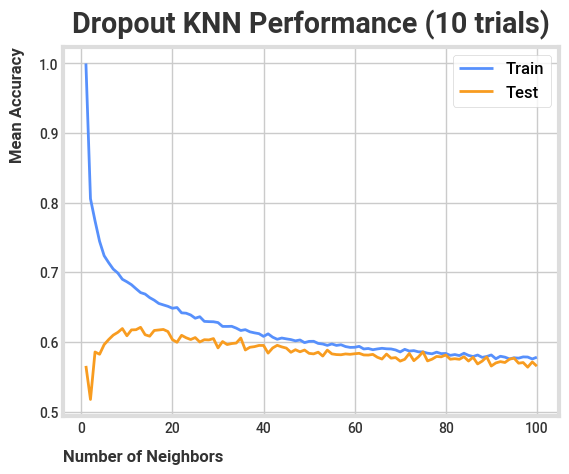

2025-02-23 13:11:49.241 | INFO     | machine_learning.modeling.pipepline:grid_search:85 - Finished Grid Search for Dropout
 Train max accuracy: 1.0
 Test max accuracy: 0.6209764918625679


In [15]:
from machine_learning.modeling import pipepline
import warnings
warnings.filterwarnings("ignore")

knn_pipe = pipepline.KNNPipeline(X, y, "Dropout")

knn_pipe_results = knn_pipe.grid_search(range(1, 101), trials=10, plot=True, test_size=0.25)

2025-02-23 13:14:40.291 | INFO     | machine_learning.modeling.pipepline:grid_search:64 - Starting Grid Search for Dropout. n_neighbors: range(1, 10), trials: 10


Grid Search (10 trials): 100%|██████████| 9/9 [00:31<00:00,  3.46s/n_neighbors]


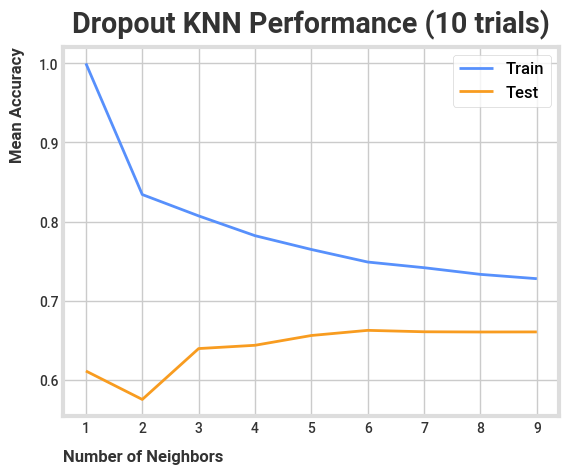

2025-02-23 13:15:11.597 | INFO     | machine_learning.modeling.pipepline:grid_search:85 - Finished Grid Search for Dropout
 Train max accuracy: 1.0
 Test max accuracy: 0.6622965641952983


In [16]:
knn_pipe = pipepline.KNNPipeline(X, y, "Dropout")

knn_pipe_results = knn_pipe.grid_search(range(1, 10), trials=10, plot=True, test_size=0.25, metric="cityblock")

2025-02-23 13:15:11.604 | INFO     | machine_learning.modeling.pipepline:grid_search:64 - Starting Grid Search for Dropout. n_neighbors: range(1, 10), trials: 10


Grid Search (10 trials): 100%|██████████| 9/9 [00:33<00:00,  3.76s/n_neighbors]


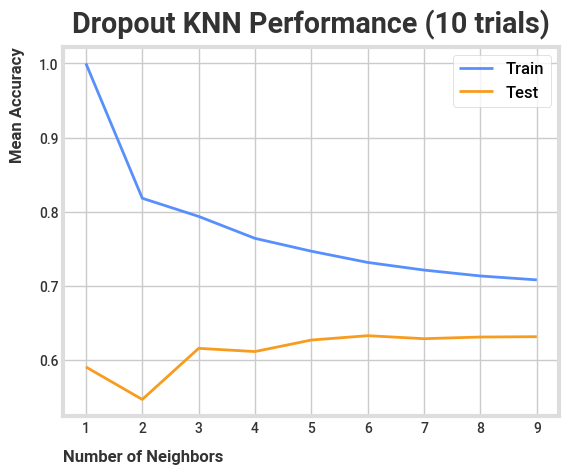

2025-02-23 13:15:45.600 | INFO     | machine_learning.modeling.pipepline:grid_search:85 - Finished Grid Search for Dropout
 Train max accuracy: 1.0
 Test max accuracy: 0.6325497287522605


In [17]:
knn_pipe = pipepline.KNNPipeline(X, y, "Dropout")

knn_pipe_results = knn_pipe.grid_search(range(1, 10), trials=10, plot=True, test_size=0.25, metric="cosine")

2025-02-23 13:22:31.957 | INFO     | machine_learning.modeling.pipepline:grid_search:64 - Starting Grid Search for Dropout. n_neighbors: range(1, 10), trials: 10


Grid Search (10 trials): 100%|██████████| 9/9 [00:44<00:00,  4.96s/n_neighbors]


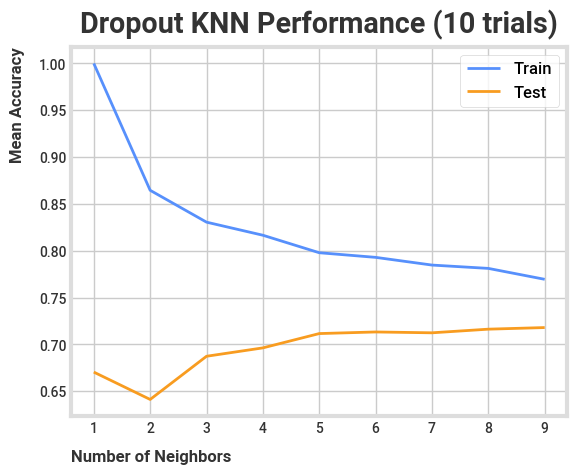

2025-02-23 13:23:16.760 | INFO     | machine_learning.modeling.pipepline:grid_search:85 - Finished Grid Search for Dropout
 Train max accuracy: 1.0
 Test max accuracy: 0.7179927667269441


In [19]:
knn_pipe = pipepline.KNNPipeline(X, y, "Dropout")

knn_pipe_results = knn_pipe.grid_search(range(1, 10), trials=10, plot=True, test_size=0.25, metric="hamming")

2025-02-23 13:24:18.362 | INFO     | machine_learning.modeling.pipepline:grid_search:64 - Starting Grid Search for Dropout. n_neighbors: range(1, 10), trials: 10


Grid Search (10 trials): 100%|██████████| 9/9 [00:31<00:00,  3.55s/n_neighbors]


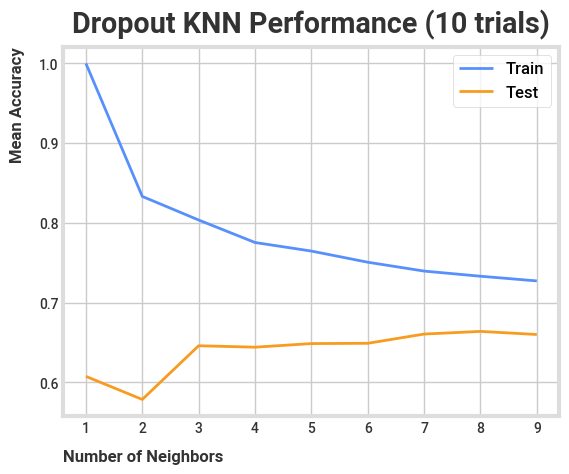

2025-02-23 13:24:50.504 | INFO     | machine_learning.modeling.pipepline:grid_search:85 - Finished Grid Search for Dropout
 Train max accuracy: 1.0
 Test max accuracy: 0.6639240506329113


In [20]:
knn_pipe = pipepline.KNNPipeline(X, y, "Dropout")

knn_pipe_results = knn_pipe.grid_search(range(1, 10), trials=10, plot=True, test_size=0.25, metric="manhattan")

2025-02-23 13:29:01.738 | INFO     | machine_learning.modeling.pipepline:grid_search:64 - Starting Grid Search for Dropout. n_neighbors: range(1, 100), trials: 10


Grid Search (10 trials): 100%|██████████| 99/99 [06:28<00:00,  3.93s/n_neighbors]


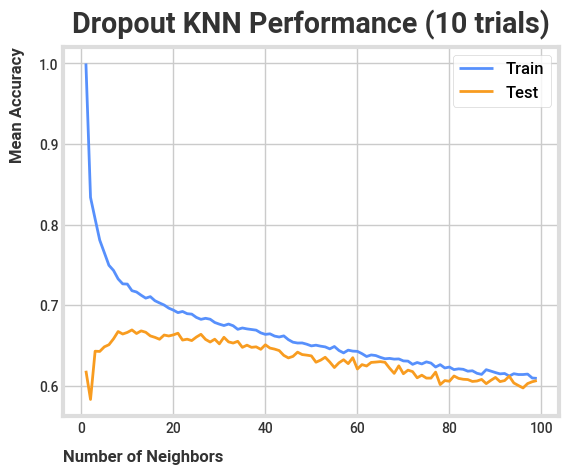

2025-02-23 13:35:30.696 | INFO     | machine_learning.modeling.pipepline:grid_search:85 - Finished Grid Search for Dropout
 Train max accuracy: 1.0
 Test max accuracy: 0.6693490054249549


In [22]:
knn_pipe = pipepline.KNNPipeline(X, y, "Dropout")

knn_pipe_results = knn_pipe.grid_search(range(1, 100), trials=10, plot=True, test_size=0.25, metric="l1")